# Финальный проект по SQL

# Описание проекта

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Моя компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Моя первая задача как аналитика — проанализировать базу данных.

В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

Задачи:
- Посчитать, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитать количество обзоров и среднюю оценку;
- Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так брошюры будут исключены из анализа;
- Определить автора с самой высокой средней оценкой книг — учитывать только книги с 50 и более оценками;
- Посчитать среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

# Описание данных

Описание данных:
- Таблица `books`

Содержит данные о книгах:
- `book_id` — **идентификатор книги;**
- `author_id` — **идентификатор автора;**
- `title` — **название книги;**
- `num_pages` — **количество страниц;**
- `publication_date` — **дата публикации книги;**
- `publisher_id` — **идентификатор издателя.**

Таблица `authors`

Содержит данные об авторах:
- `author_id` — **идентификатор автора;**
- `author` — **имя автора.**

Таблица `publishers`

Содержит данные об издательствах:
- `publisher_id` — **идентификатор издательства;**
- `publisher` — **название издательства;**

Таблица `ratings`

Содержит данные о пользовательских оценках книг:
- `rating_id` — **идентификатор оценки;**
- `book_id` — **идентификатор книги;**
- `username` — **имя пользователя, оставившего оценку;**
- `rating` — **оценка книги.**

Таблица `reviews`

Содержит данные о пользовательских обзорах:
- `review_id` — **идентификатор обзора;**
- `book_id` — **идентификатор книги;**
- `username` — **имя автора обзора;**
- `text` — **текст обзора.**

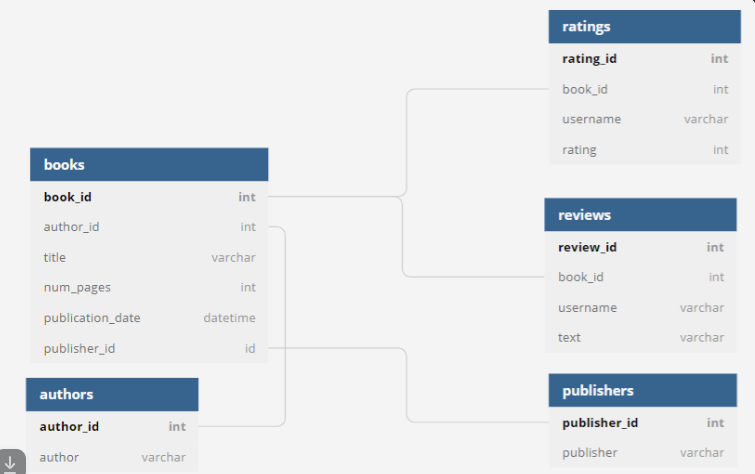

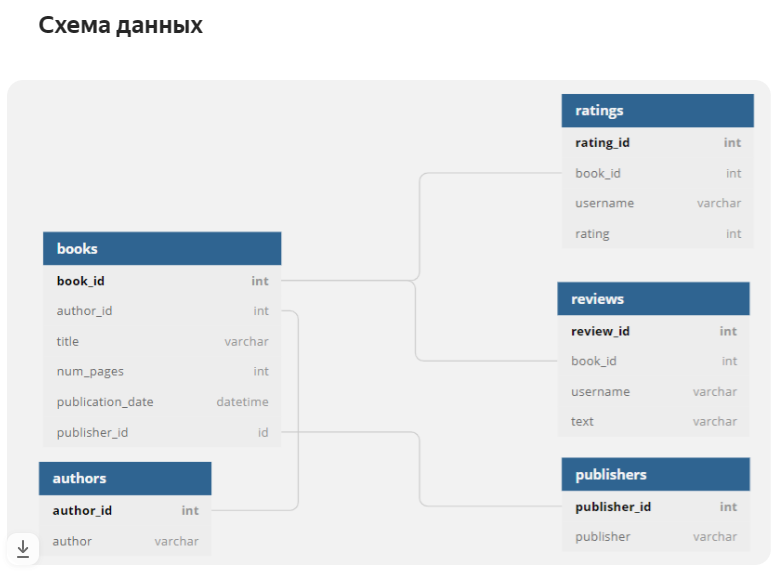

# Работа с проектом

**Импортирую все необходимые библиотеки для проекта**

In [27]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})
# чтобы выполнить SQL-запрос, используем Pandas
query = '''SELECT * FROM books LIMIT 5'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


**Вывожу на экран все доступные таблицы, даю им имена**

In [28]:
books = pd.io.sql.read_sql('SELECT * FROM books', con = engine) 
authors = pd.io.sql.read_sql('SELECT * FROM authors', con = engine) 
publishers = pd.io.sql.read_sql('SELECT * FROM publishers', con = engine) 
ratings = pd.io.sql.read_sql('SELECT * FROM ratings', con = engine) 
reviews = pd.io.sql.read_sql('SELECT * FROM reviews', con = engine)

**Работа с таблицей `books`**

**Вывожу на экран первые 10 строк таблицы**

In [29]:
books.head(10)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
5,6,257,1st to Die (Women's Murder Club #1),424,2005-05-20,116
6,7,258,2nd Chance (Women's Murder Club #2),400,2005-05-20,116
7,8,260,4th of July (Women's Murder Club #4),448,2006-06-01,318
8,9,563,A Beautiful Mind,461,2002-02-04,104
9,10,445,A Bend in the Road,341,2005-04-01,116


**Вывожу сводную информацию о таблице**

In [30]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


**Проверяю таблицу на наличие дубликатов**

In [31]:
books.duplicated().sum()

0

**Пропусков и дубликатов в таблице `books` не обнаружено, все данные корректны**

**Работа с таблицей `authors`**

**Вывожу на экран первые 10 строк таблицы**

In [32]:
authors.head(10)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd
5,6,Alan Paton
6,7,Albert Camus/Justin O'Brien
7,8,Aldous Huxley
8,9,Aldous Huxley/Christopher Hitchens
9,10,Aleksandr Solzhenitsyn/H.T. Willetts


**Вывожу сводную информацию о таблице**

In [33]:
authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


**Проверяю таблицу на наличие дубликатов**

In [34]:
authors.duplicated().sum()

0

**Пропусков и дубликатов в таблице `authors` не обнаружено, все данные корректны**

**Работа с таблицей `publishers`**

**Вывожу на экран первые 10 строк таблицы**

In [35]:
publishers.head(10)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company
5,6,Aladdin
6,7,Aladdin Paperbacks
7,8,Albin Michel
8,9,Alfred A. Knopf
9,10,Alfred A. Knopf Books for Young Readers


**Вывожу сводную информацию о таблице**

In [36]:
publishers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


**Проверяю таблицу на наличие дубликатов**

In [37]:
publishers.duplicated().sum()

0

**Пропусков и дубликатов в таблице `publishers` не обнаружено, все данные корректны**

**Работа с таблицей `ratings`**

**Вывожу на экран первые 10 строк таблицы**

In [38]:
ratings.head(10)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2
5,6,3,johnsonamanda,4
6,7,3,scotttamara,5
7,8,3,lesliegibbs,5
8,9,4,abbottjames,5
9,10,4,valenciaanne,4


**Вывожу сводную информацию о таблице**

In [39]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


**Проверяю таблицу на наличие дубликатов**

In [40]:
ratings.duplicated().sum()

0

**Пропусков и дубликатов в таблице `ratings` не обнаружено, все данные корректны**

**Работа с таблицей `reviews`**

**Вывожу на экран первые 10 строк таблицы**

In [41]:
reviews.head(10)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...
5,6,3,lesliegibbs,Analysis no several cause international.
6,7,4,valenciaanne,One there cost another. Say type save. With pe...
7,8,4,abbottjames,Within enough mother. There at system full rec...
8,9,5,npowers,Thank now focus realize economy focus fly. Ite...
9,10,5,staylor,Game push lot reduce where remember. Including...


**Вывожу сводную информацию о таблице**

In [42]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


**Проверяю таблицу на наличие дубликатов**

In [43]:
reviews.duplicated().sum()

0

**Пропусков и дубликатов в таблице `reviews` не обнаружено, все данные корректны**

# Все данные корректны, предобработка данных не необходима

# Задача №1. Посчитать, сколько книг вышло после 1 января 2000 года

In [44]:
query = '''
SELECT COUNT(*)
FROM books
WHERE publication_date > '2000-01-01';
'''
pd.io.sql.read_sql(query, con = engine)

,count
0,819


**После 1 января 2000 года вышло 819 книг**

# Задача №2. Для каждой книги посчитать количество обзоров и среднюю оценку

In [45]:
query = '''
SELECT books.title AS title, 
       AVG(ratings.rating) AS avg_rating,
       COUNT(DISTINCT(reviews.review_id)) AS review_count
FROM books 
LEFT JOIN ratings ON ratings.book_id = books.book_id 
LEFT JOIN reviews ON reviews.book_id = books.book_id
GROUP BY books.book_id;
'''
pd.io.sql.read_sql(query, con = engine)

,title,avg_rating,review_count
0,'Salem's Lot,3.666667,2
1,1 000 Places to See Before You Die,2.500000,1
2,13 Little Blue Envelopes (Little Blue Envelope...,4.666667,3
3,1491: New Revelations of the Americas Before C...,4.500000,2
4,1776,4.000000,4
...,...,...,...
995,Wyrd Sisters (Discworld #6; Witches #2),3.666667,3
996,Xenocide (Ender's Saga #3),3.400000,3
997,Year of Wonders,3.200000,4
998,You Suck (A Love Story #2),4.500000,2


**Получены средние оценки и подсчитано количество обзоров на все книги**

# Задача №3. Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так брошюры будут исключены из анализа

In [46]:
query = '''
SELECT publishers.publisher AS publisher, 
       COUNT(books.book_id) AS books_count
FROM publishers 
LEFT JOIN books ON books.publisher_id = publishers.publisher_id 
WHERE num_pages > 50
GROUP BY publishers.publisher 
ORDER BY books_count DESC 
LIMIT 1;
'''
pd.io.sql.read_sql(query, con = engine)

,publisher,books_count
0,Penguin Books,42


**Издательство, которое выпустило наибольшее число книг толще 50 страниц - `Penguin Books`**

# Задача №4. Определить автора с самой высокой средней оценкой книг — учитывать только книги с 50 и более оценками

In [47]:
query = '''
SELECT authors.author,
       AVG(ratings.rating) AS avg_rating
FROM books
LEFT JOIN ratings on books.book_id = ratings.book_id
LEFT JOIN authors on books.author_id = authors.author_id
WHERE books.book_id IN (
    SELECT ratings.book_id
    FROM ratings
    GROUP BY ratings.book_id
    HAVING COUNT(ratings.rating) > 50)
GROUP BY authors.author
ORDER BY avg_rating DESC
LIMIT 1;
'''
pd.io.sql.read_sql(query, con = engine)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.287097


**Автор с самой высокой средней оценкой книг - `Джоан Роулинг`/`Мэри Гранпрэ`**

# Задача №5. Посчитать среднее количество обзоров от пользователей, которые поставили больше 48 оценок

In [85]:
query = '''
SELECT AVG(r.count) AS avg_reviews
FROM (
    SELECT count(*)
    FROM reviews
    WHERE username IN (
        SELECT username
        FROM ratings
        GROUP BY username
        HAVING count(rating) > 50)
    GROUP BY username) AS r;
'''
pd.io.sql.read_sql(query, con = engine)

,avg_reviews
0,24.333333


**Среднее количество пользователей, которые поставили больше 48 оценок - 24**